In [1]:
import json
import bz2
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

**Часть 1. Анализ текстов**

In [2]:
# Излечение данных из архива
responses = []
with bz2.BZ2File(r"D:\НЕТОЛОГИЯ\NLP\файлы\banki_responses.json.bz2", 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

0it [00:00, ?it/s]

In [3]:
# Создание датафрейма
df = pd.DataFrame(responses)
display(df.shape)
df.head()

(153499, 10)

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
0,г. Москва,False,Жалоба,0,лицензия № 2562,uhnov1,Бинбанк,2015-06-08 12:50:54,Добрый день! Я не являюсь клиентом банка и пор...,NaN
1,г. Новосибирск,False,Не могу пользоваться услугой Сбербанк он-лайн,0,лицензия № 1481,Foryou,Сбербанк России,2015-06-08 11:09:57,Доброго дня! Являюсь держателем зарплатной кар...,NaN
2,г. Москва,False,Двойное списание за один товар.,1,лицензия № 2562,Vladimir84,Бинбанк,2015-06-05 20:14:28,Здравствуйте! Дублирую свое заявление от 03.0...,NaN
3,г. Ставрополь,False,Меняют проценты комиссии не предупредив и не ...,2,лицензия № 1481,643609,Сбербанк России,2015-06-05 13:51:01,Добрый день!! Я открыл расчетный счет в СберБа...,NaN
4,г. Челябинск,False,Верните денежные средства за страховку,1,лицензия № 2766,anfisa-2003,ОТП Банк,2015-06-05 10:58:12,"04.03.2015 г. взяла кредит в вашем банке, заяв...",NaN


*1. Посчитайте количество отзывов в разных городах и на разные банки*

In [6]:
# Распределение отзывов по названию банка
df.groupby(['bank_name']).count()['rating_not_checked'].sort_values(ascending = False).reset_index()

,bank_name,rating_not_checked
0,Сбербанк России,26327
1,Альфа-Банк,10224
2,ВТБ 24,8185
3,Русский Стандарт,7943
4,Хоум Кредит Банк,7549
...,...,...
665,Северный Народный Банк,1
666,Сельмашбанк,1
667,Сиббизнесбанк,1
668,Сибконтакт,1


In [7]:
# Распределение отзывов по городам
df.groupby(['city']).count()['rating_not_checked'].sort_values(ascending = False).reset_index()

,city,rating_not_checked
0,г. Москва,55354
1,г. Санкт-Петербург,14342
2,г. Екатеринбург,2337
3,г. Новосибирск,2300
4,г. Нижний Новгород,1976
...,...,...
5818,"г. Москва, Ногинск (Москва)",1
5819,"г. Москва, Новосибирск",1
5820,"г. Москва, Николоямская ул., 31",1
5821,"г. Москва, Московская область",1


In [8]:
# Распределение отзывов на банк внутри городов
df.groupby(['city', 'bank_name']).count()['rating_not_checked'].sort_values(ascending = False)

city                                 bank_name                
г. Москва                            Сбербанк России              8146
                                     Альфа-Банк                   3871
                                     Русский Стандарт             2801
                                     ВТБ 24                       2714
г. Санкт-Петербург                   Сбербанк России              2434
                                                                  ... 
г. Москва,  Отделение "Жулебинское"  Московский Кредитный Банк       1
г. Москва, "Китай-город"             Фора-Банк                       1
г. Москва, Ветошный пер              Восточный Экспресс Банк         1
г. Москва, Видное                    Сбербанк России                 1
г. … или другой населенный пункт     Лето Банк                       1
Name: rating_not_checked, Length: 18769, dtype: int64

*2. Постройте гистограмы длин текстов в символах и в словах*

In [10]:
# Расчет длины текста в символах
df['len_in_syms'] = df['text'].apply(lambda x: len(x))

# Расчет длины текста в словах
df['len_in_words'] = df['text'].apply(lambda x: len(x.split(' ')))

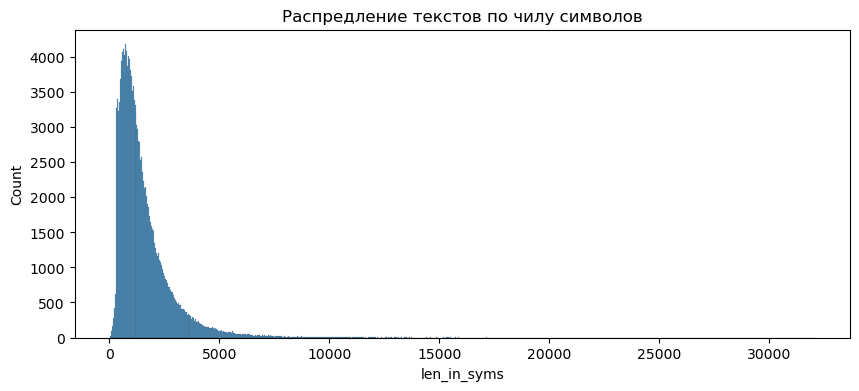

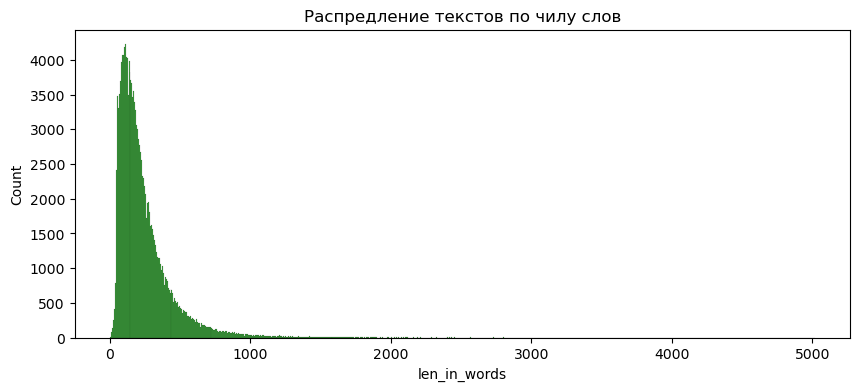

In [11]:
#Гистограммы
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 4))
plt.title('Распредление текстов по чилу символов')
sns.histplot(df['len_in_syms'])
plt.show()

plt.figure(figsize = (10, 4))
plt.title('Распредление текстов по чилу слов')
sns.histplot(df['len_in_words'], color = 'g')
plt.show()

*3.1. Найдите 10 самых частых слов*

In [4]:
# Предобработка текстов. Приведение к нижнему регистру. Оставлем только содержащие кириллицу слова
import re

ru_words = re.compile('[А-Яа-я]+')
df['text'] = df['text'].apply(lambda x: ' '.join(ru_words.findall(x.lower())))

In [7]:
# Создание "мешка слов". Токенизация. Удаление знаков пунктуации
from nltk.tokenize import word_tokenize
from string import punctuation

bow = [token for tweet in tqdm(df['text']) for token in word_tokenize(tweet) if token not in punctuation]

  0%|          | 0/153499 [00:00<?, ?it/s]

In [20]:
# 10 самых частых слов
from collections import Counter

freq_dict = Counter(bow)
freq_dict.most_common(10)

[('в', 1330550),
 ('и', 1058997),
 ('не', 855335),
 ('на', 707935),
 ('что', 640057),
 ('я', 577500),
 ('с', 464037),
 ('по', 372769),
 ('мне', 320958),
 ('банка', 275906)]

*3.2. Найдите 10 самых частых слов без стоп-слов*

In [21]:
# Удаление стоп-слов
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('russian')
stopwords_dict = Counter(stop_words)
bow_nostop = [token for token in bow if token not in stopwords_dict]

In [18]:
# 10 самых частых слов (без стоп-слов)
freq_dict_nostop = Counter(bow_nostop)
freq_dict_nostop.most_common(10)

[('банка', 275906),
 ('банк', 215426),
 ('это', 183365),
 ('деньги', 131201),
 ('карту', 105829),
 ('карты', 101821),
 ('т', 91756),
 ('кредит', 81136),
 ('день', 76552),
 ('банке', 72169)]

*3.3. Найдите 10 самых частых лемм*

In [24]:
# Лемматизация через pymorphy3
from tqdm.auto import tqdm
from pymorphy3 import MorphAnalyzer
pymorphy3_analyzer = MorphAnalyzer()

tqdm.pandas()

df['text'] =df['text'].progress_apply(lambda x: ' '.join([pymorphy3_analyzer.parse(word)[0].normal_form for word in word_tokenize(x) if word not in stopwords_dict]))

  0%|          | 0/153499 [00:00<?, ?it/s]

In [23]:
#10 самых частых лемм
bow_lemm = [lemms for text in tqdm(df['text']) for lemms in text.split(' ')]
freq_dict_lemm = Counter(bow_lemm)
freq_dict_lemm.most_common(10)

  0%|          | 0/153499 [00:00<?, ?it/s]

[('банк', 668563),
 ('карта', 334999),
 ('это', 200057),
 ('деньга', 179819),
 ('день', 173116),
 ('мой', 163042),
 ('кредит', 156177),
 ('который', 149017),
 ('отделение', 144050),
 ('клиент', 136892)]

*3.4. Найдите 10 самых частых существительных*

In [24]:
# Новый словарь только для существительных
nouns = {}
for key, value in tqdm(freq_dict_lemm.items()):
    if pymorphy3_analyzer.tag(key)[0].POS == 'NOUN': 
        nouns[key] = value

# Сортировка словаря по убыванию
nouns = {k: v for k, v in sorted(nouns.items(), key=lambda item: item[1], reverse=True)}

# 10 самых частых существительных
list(nouns.items())[0:10]

  0%|          | 0/93472 [00:00<?, ?it/s]

[('банк', 668563),
 ('карта', 334999),
 ('деньга', 179819),
 ('день', 173116),
 ('кредит', 156177),
 ('отделение', 144050),
 ('клиент', 136892),
 ('сотрудник', 134168),
 ('счёт', 126894),
 ('сумма', 111232)]

*4. Постройте кривые Ципфа и Хипса*

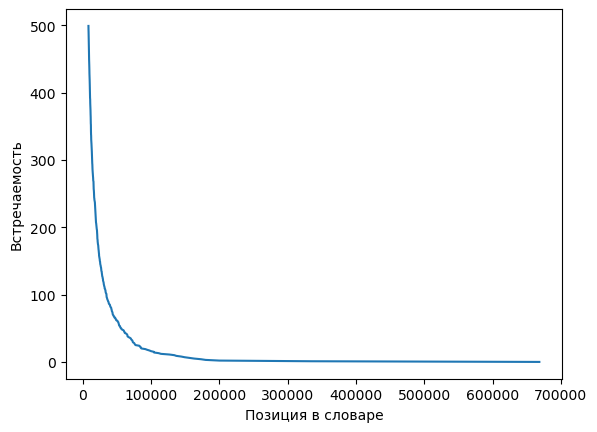

In [25]:
#Кривая Ципфа
freqs = list(freq_dict_lemm.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:500], range(500))
plt.xlabel('Позиция в словаре')
plt.ylabel('Встречаемость')
plt.show()

  0%|          | 0/153499 [00:00<?, ?it/s]

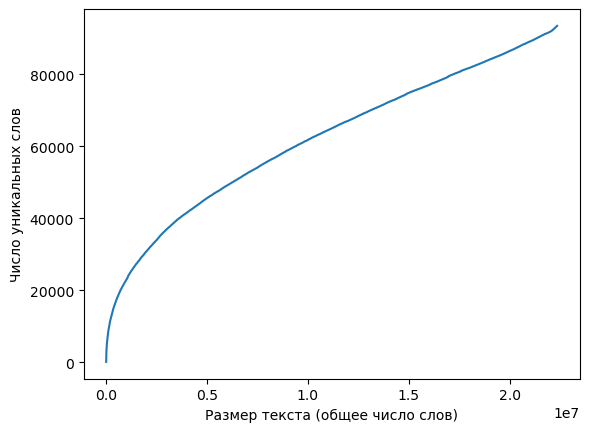

In [26]:
#Кривая Хипса
cnt = Counter()
n_words = []
n_tokens = []
tokens = []

for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = word_tokenize(row['text'])
    cnt.update([token for token in tokens if token not in punctuation])
    n_words.append(len(cnt))
    n_tokens.append(sum(cnt.values()))

fig, ax = plt.subplots()
ax.plot(n_tokens, n_words)
plt.xlabel('Размер текста (общее число слов)')
plt.ylabel('Число уникальных слов')
plt.show()

*5. Ответьте на следующие вопросы*

In [27]:
# какое слово встречается чаще, "сотрудник" или "клиент"?
if freq_dict_lemm['сотрудник'] > freq_dict_lemm['клиент']: print('чаще встречается слово "сотрудник"')
else: print('чаще встречается слово "клиент"')

чаще встречается слово "клиент"


In [28]:
#сколько раз встречается слова "мошенничество" и "доверие"?
print('Частота слова "мошенничество":', freq_dict_lemm['мошенничество'],'\nЧастота слова "доверие":', freq_dict_lemm['доверие'])

Частота слова "мошенничество": 3244 
Частота слова "доверие": 2108


*6. Ключевые слова и биграмы для положительных и отрицательных отзывов. Используйте меру TF-IDF, для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)*

In [30]:
# Разделим исходные отзвызы на те, которые имеют оценку "5" и на те, у которых оценка "1"
text_pos = df[(df['rating_grade'] == 1.)]['text']
text_neg = df[(df['rating_grade'] == 5.)]['text']

print('Число положительных отзывов:', len(text_pos))
print('Число отрицательных отзывов:', len(text_neg))

Число положительных отзывов: 47387
Число отрицательных отзывов: 14713


In [46]:
# TF-IDF. Энграммы из одного слова
from sklearn.feature_extraction.text import TfidfVectorizer

vec_single_pos = TfidfVectorizer()
vec_single_neg = TfidfVectorizer()

vec_single_pos.fit(text_pos)
vec_single_neg.fit(text_neg)

TfidfVectorizer()

*Парс-матрицы корпусов при переводе в массив занимают непропрориционально большой объем памяти (около 20 Гб). Поэтому посмотрим на ключевые слова только в виде словаря*

In [58]:
# Униграммы. Наиболее частые слова
print('Положительные отзывы')
display(list(vec_single_pos.vocabulary_.items())[0:10])
print()
print('Отрицательные отзывы')
display(list(vec_single_neg.vocabulary_.items())[0:10])

Положительные отзывы


[('открыть', 30978),
 ('вклад', 5464),
 ('счёт', 48554),
 ('плюс', 34053),
 ('этот', 56114),
 ('зарплатный', 14130),
 ('карта', 17047),
 ('рубль', 43233),
 ('сам', 43703),
 ('себя', 44560)]


Отрицательные отзывы


[('досрочно', 7078),
 ('закрывать', 8413),
 ('вклад', 3476),
 ('отпуск', 19608),
 ('жена', 7725),
 ('заказывать', 8326),
 ('заранее', 8785),
 ('забыть', 7986),
 ('заказать', 8322),
 ('сотрудник', 29509)]

In [62]:
# TF-IDF. Энграммы из двух слов
vec_double_pos = TfidfVectorizer(ngram_range = (2,2))
vec_double_neg = TfidfVectorizer(ngram_range = (2,2))

vec_double_pos.fit(text_pos)
vec_double_neg.fit(text_neg)

TfidfVectorizer(ngram_range=(2, 2))

In [64]:
# Биграммы. Наиболее частые слова
print('Положительные отзывы')
display(list(vec_double_pos.vocabulary_.items())[0:10])
print()
print('Отрицательные отзывы')
display(list(vec_double_neg.vocabulary_.items())[0:10])

Положительные отзывы


[('открыть вклад', 1115529),
 ('вклад счёт', 158201),
 ('счёт плюс', 1868963),
 ('плюс этот', 1229951),
 ('этот зарплатный', 2110371),
 ('зарплатный карта', 503082),
 ('карта рубль', 621005),
 ('рубль сам', 1621305),
 ('сам себя', 1637778),
 ('себя сегодня', 1672547)]


Отрицательные отзывы


[('досрочно закрывать', 163496),
 ('закрывать вклад', 191596),
 ('вклад отпуск', 66760),
 ('отпуск жена', 449144),
 ('жена заказывать', 179402),
 ('заказывать заранее', 190057),
 ('заранее забыть', 200435),
 ('забыть заказать', 184004),
 ('заказать сотрудник', 189935),
 ('сотрудник банк', 703778)]

In [66]:
# TF-IDF. Энграммы из трех слов
vec_tri_pos = TfidfVectorizer(ngram_range = (3,3))
vec_tri_neg = TfidfVectorizer(ngram_range = (3,3))

vec_tri_pos.fit(text_pos)
vec_tri_neg.fit(text_neg)

TfidfVectorizer(ngram_range=(3, 3))

In [68]:
# Триграммы. Наиболее частые слова
print('Положительные отзывы')
display(list(vec_tri_pos.vocabulary_.items())[0:10])
print()
print('Отрицательные отзывы')
display(list(vec_tri_neg.vocabulary_.items())[0:10])

Положительные отзывы


[('открыть вклад счёт', 3239138),
 ('вклад счёт плюс', 481376),
 ('счёт плюс этот', 5314725),
 ('плюс этот зарплатный', 3555244),
 ('этот зарплатный карта', 5959690),
 ('зарплатный карта рубль', 1474375),
 ('карта рубль сам', 1844104),
 ('рубль сам себя', 4570653),
 ('сам себя сегодня', 4618768),
 ('себя сегодня прийти', 4729764)]


Отрицательные отзывы


[('досрочно закрывать вклад', 364795),
 ('закрывать вклад отпуск', 414341),
 ('вклад отпуск жена', 158352),
 ('отпуск жена заказывать', 931766),
 ('жена заказывать заранее', 395258),
 ('заказывать заранее забыть', 411966),
 ('заранее забыть заказать', 429459),
 ('забыть заказать сотрудник', 402507),
 ('заказать сотрудник банк', 411716),
 ('сотрудник банк спб', 1428059)]

**Часть 2. Тематическое моделирование**

In [72]:
# Посмотрим на уже существующие темы
print('Тексты без темы:', len(df[(df['title'] == '')]))
print('Число уникальных тем:', len(df[(df['title'] != '')]))
print()
print('20 самых частых тем:\n', df[(df['title'] != '')]['title'].value_counts()[0:20])

Тексты без темы: 1223
Число уникальных тем: 152276

20 самых частых тем:
 Претензия                       364
Кредитная карта                 317
Жалоба                          286
Благодарность                   248
Звонки из банка                 203
Банкомат съел деньги            176
Автокредит                      163
Телефонный терроризм            158
Потребительский кредит          157
Перевыпуск карты                155
Отвратительное обслуживание     152
Хороший банк                    150
Некомпетентность сотрудников    147
Отличный банк                   146
Ипотека                         144
Открытие вклада                 130
Звонки                          122
Обслуживание                    119
Украли деньги с карты           119
Реструктуризация                118
Name: title, dtype: int64


*2.1. Модель латентно-семантического анализа*

In [76]:
# Создание словаря и "мешка слов"
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import lsimodel

texts = [text.split() for text in tqdm(df['text'])]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in tqdm(texts)]

#TF-IDF-векторизация
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

  0%|          | 0/153499 [00:00<?, ?it/s]

  0%|          | 0/153499 [00:00<?, ?it/s]

In [77]:
# Модели LSA. Т.к. создание модели для всех уникалдьных тем (122 940) займет слишком много памяти, используем модели для 50, 100 и 200 тем
lsi_50 = lsimodel.LsiModel(corpus = corpus_tfidf, id2word = dictionary, num_topics = 50)
lsi_100 = lsimodel.LsiModel(corpus = corpus_tfidf, id2word = dictionary, num_topics = 100)
lsi_200 = lsimodel.LsiModel(corpus = corpus_tfidf, id2word = dictionary, num_topics = 200)

In [78]:
print('LSA 50 тем')
for t in lsi_50.show_topics(5):
    print(t[1].replace(' + ', ', '))
    print()
print()
print('LSA 100 тем')
for t in lsi_50.show_topics(5):
    print(t[1].replace(' + ', ', '))
    print()
print()
print('LSA 200 тем')
for t in lsi_50.show_topics(5):
    print(t[1].replace(' + ', ', '))
    print()

LSA 50 тем
0.192*"карта", 0.131*"кредит", 0.113*"деньга", 0.108*"заявление", 0.105*"счёт", 0.100*"банкомат", 0.099*"вклад", 0.099*"отделение", 0.095*"сбербанк", 0.095*"сумма"

-0.380*"вклад", 0.357*"кредит", -0.215*"банкомат", -0.171*"карта", 0.164*"страховка", 0.146*"задолженность", 0.142*"платёж", 0.137*"погашение", -0.120*"деньга", 0.117*"звонок"

-0.496*"вклад", 0.278*"банкомат", 0.217*"карта", 0.185*"сбербанк", 0.135*"заявление", -0.129*"кредит", 0.121*"операция", 0.118*"деньга", -0.118*"договор", 0.116*"средство"

-0.257*"вклад", -0.219*"сумма", 0.208*"номер", -0.188*"руб", 0.165*"заявка", -0.159*"погашение", -0.156*"платёж", 0.156*"звонок", -0.155*"договор", -0.146*"рубль"

0.337*"вклад", -0.262*"карта", 0.260*"номер", -0.206*"страховка", -0.196*"заявка", 0.180*"звонок", 0.139*"ваш", -0.139*"кредит", 0.132*"телефон", -0.129*"лимит"


LSA 100 тем
0.192*"карта", 0.131*"кредит", 0.113*"деньга", 0.108*"заявление", 0.105*"счёт", 0.100*"банкомат", 0.099*"вклад", 0.099*"отделение", 0.0

2.2. *Примеры понятных (интерпретируемых) тем*

Тема "0.361*"кредит", -0.357*"вклад", -0.228*"банкомат", -0.180*"карта", 0.168*"страховка", 0.145*"задолженность", 0.139*"платёж", 0.136*"погашение", -0.126*"деньга", 0.120*"звонок". Эта тема может описывать тексты, в которых упоминается выплата по кредиту. Ее можно сопоставить с такими уже имеющимися темами как "Кредит" и "Досрочное погашение кредита".

Тема "0.345*"вклад", -0.259*"карта", 0.253*"номер", -0.207*"заявка", -0.201*"страховка", 0.179*"звонок", 0.139*"ваш", -0.136*"кредит", 0.128*"телефон", -0.124*"лимит". Эта тема может описывать тексты, посвященные операциям по вкладам через колл-центр банка. Ее можно сопоставить с такими уже имеющимися темами как "Открытие вклада", "Звонки" и "Вклад".

Тема "0.481*"банкомат", -0.367*"карта", 0.159*"купюра", 0.141*"деньга", -0.139*"лимит", -0.136*"кредитный", 0.123*"кредит", -0.119*"смс", 0.115*"чек", 0.111*"очередь". Эта тема может касаться текстов, посвященных работе банкоматов. Ее можно сопоставить с такими уже имеющимися темами как "Банкомат съел деньги", "Банкоматы" и "Банкомат не выдал деньги".

2.3. *Темы, в которых упомянуты конкретные банки (Сбербанк, ВТБ, другой банк).*

In [87]:
# Получим список всех банков
all_banks = list(df['bank_name'].value_counts().index)
all_banks = [bank.lower() for bank in all_banks]

# Будем производить поиск в списке тем модели lsi_200
banks_topics = []
for topic in lsi_200.show_topics():
    for bank in all_banks:
        if bank in topic[1]:
            banks_topics.append(topic[1].replace(' + ', ', '))

print(f'Найдено {len(banks_topics)} тем')
print()
banks_topics

Найдено 54 тем



['-0.300*"справка", -0.212*"страховка", 0.199*"линия", 0.196*"горячий", -0.174*"задолженность", -0.169*"очередь", -0.162*"перевод", -0.161*"номер", -0.159*"втб", 0.155*"связный"',
 '0.286*"претензия", -0.237*"заявление", -0.226*"платёж", 0.212*"втб", 0.175*"договор", -0.175*"услуга", -0.161*"справка", -0.161*"альфа", 0.145*"код", -0.137*"лимит"',
 '-0.240*"справка", -0.222*"горячий", -0.221*"линия", 0.216*"перевод", 0.203*"задолженность", 0.195*"рубль", -0.190*"втб", -0.184*"лимит", -0.147*"платёж", 0.136*"купюра"',
 '0.331*"втб", 0.285*"лимит", -0.247*"справка", -0.191*"договор", -0.171*"р", 0.170*"терминал", 0.159*"рубль", 0.155*"код", 0.150*"телебанк", 0.145*"карточка"',
 '0.307*"центр", -0.289*"горячий", -0.284*"линия", 0.281*"колл", -0.195*"втб", -0.167*"купюра", 0.140*"кредит", -0.135*"справка", -0.134*"рубль", 0.118*"кредитный"',
 '-0.254*"центр", -0.238*"колл", -0.213*"втб", -0.186*"ваш", -0.169*"услуга", 0.154*"выписка", 0.149*"горячий", -0.148*"р", 0.147*"линия", 0.144*"рубль

**Часть 3. Классификация текстов**

*3.1. Выборки для модели*

In [25]:
# Данные для модели
df_rate = df[(df['rating_grade']).isin([1, 5])][['rating_grade', 'text']]
display(df_rate.shape)
df_rate.head()

(62100, 2)

,rating_grade,text
19,1.0,открыть вклад счёт плюс этот зарплатный карта ...
33,1.0,добрый время вчера поступить смс уведомление б...
76,1.0,г около час прийти указанный офис намерение по...
85,1.0,оплата коммунальный платёж пользоваться пласти...
94,1.0,апрель год прийти отделение сбербанк г чапаевс...


In [26]:
# Обучающая и тестовая выбоки
from sklearn.model_selection import train_test_split

y = df_rate['rating_grade']
X = df_rate['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

*3.2. Векторизация и обучение модели*

In [27]:
# Векторизация через CountVectorizer. Униграммы, би-, три-граммы
from sklearn.feature_extraction.text import CountVectorizer

vec1 = CountVectorizer(ngram_range = (1, 1))
vec2 = CountVectorizer(ngram_range = (2, 2))
vec3 = CountVectorizer(ngram_range = (3, 3))

bow1 = vec1.fit_transform(X_train)
bow2 = vec2.fit_transform(X_train)
bow3 = vec3.fit_transform(X_train)

In [28]:
# Создание модели логистической регрессии. Расчет accuracy и F-measure
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

def metics(vec, bow):
    clf = LogisticRegression(random_state = 42)
    clf.fit(bow, y_train)
    y_pred = clf.predict(vec.transform(X_test))
    return f'Ассuracy: {f1_score(y_test, y_pred):.4f}, F1-score: {f1_score(y_test, y_pred):.4f}'

print('Модель на униграммах:', metics(vec1, bow1))
print('Модель на биграммах:', metics(vec2, bow2))
print('Модель на триграммах:', metics(vec3, bow3))

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Модель на униграммах: Ассuracy: 0.9732, F1-score: 0.9732
Модель на биграммах: Ассuracy: 0.9679, F1-score: 0.9679
Модель на триграммах: Ассuracy: 0.9077, F1-score: 0.9077


**Вывод**. Модель лучше работает на биграммах

In [29]:
# TF-IDF-векторизация
from sklearn.feature_extraction.text import TfidfVectorizer

vec_tfidf1 = TfidfVectorizer(ngram_range = (1, 1))
vec_tfidf2 = TfidfVectorizer(ngram_range = (2, 2))
vec_tfidf3 = TfidfVectorizer(ngram_range = (3, 3))

bow_tfidf1 = vec_tfidf1.fit_transform(X_train)
bow_tfidf2 = vec_tfidf2.fit_transform(X_train)
bow_tfidf3 = vec_tfidf3.fit_transform(X_train)

print('Модель на униграммах c TF-IDF-векторизацией:', metics(vec_tfidf1, bow_tfidf1))
print('Модель на биграммах c TF-IDF-векторизацией:', metics(vec_tfidf2, bow_tfidf2))
print('Модель на триграммах c TF-IDF-векторизацией:', metics(vec_tfidf3, bow_tfidf3))

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Модель на униграммах c TF-IDF-векторизацией: Ассuracy: 0.9761, F1-score: 0.9761
Модель на биграммах c TF-IDF-векторизацией: Ассuracy: 0.9442, F1-score: 0.9442
Модель на триграммах c TF-IDF-векторизацией: Ассuracy: 0.8755, F1-score: 0.8755


**Вывод**. TF-IDF-векторизация не привела к улучшению качества модели

In [30]:
%%time
# Truncated SVD преобразование для разных размеров векторного пространства. 
# В качестве исходной матрицы для трансформации будем использовать полученную через CountVectorizer для биграмм, 
# т.к. модель на этих данных имела наилучшее качество

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import TruncatedSVD

n_space = [20, 50, 100]

def tsvd_metics(n):
    vec_tsvd = TruncatedSVD(n_components = n, random_state = 42)
    X_train_reduced = vec_tsvd.fit_transform(bow2)
    X_test_reduced = vec_tsvd.transform(vec2.transform(X_test))
    
    clf = LogisticRegression(random_state = 42)
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    return f'Ассuracy: {f1_score(y_test, y_pred):.4f}, F1-score: {f1_score(y_test, y_pred):.4f}'

for n in n_space:
    print(f'Размерность равна {n}. Метрики. {tsvd_metics(n)}')
    print()

Размерность равна 20. Метрики. Ассuracy: 0.8727, F1-score: 0.8727

Размерность равна 50. Метрики. Ассuracy: 0.8889, F1-score: 0.8889

Размерность равна 100. Метрики. Ассuracy: 0.9115, F1-score: 0.9115

CPU times: total: 4min 39s
Wall time: 2min 24s


**Вывод**. Снижение размерности через t-SVD не привело к улучшению метрик.

In [38]:
# Модели с LDA. Векторизация
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 5)
X_train_lda = lda.fit_transform(bow2)
X_test_lda = lda.fit_transform(vec2.transform(X_test))

In [39]:
# Модели с LDA. Обучение и метрики
clf = LogisticRegression(random_state = 42)
clf.fit(X_train_lda, y_train)
y_pred = clf.predict(X_test_lda)
print(f'Ассuracy: {f1_score(y_test, y_pred):.4f}, F1-score: {f1_score(y_test, y_pred):.4f}')

Ассuracy: 0.8653, F1-score: 0.8653


**Вывод**. Использование модели LDA для снижения размерности не привело к улучшению метрик.